In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import astropy.units as u
import matplotlib.pyplot as plt
import sunpy.map

from sunpy.net import Fido, attrs as a
from sunpy.visualization import drawing

from sunpy_movies import maker

# Download data around an X-class flare

In [2]:
results = Fido.search(a.Time('2024-05-31 22:00:00', '2024-05-31 22:15:00'), a.Instrument.aia, a.Wavelength(171*u.angstrom), a.Provider('JSOC'))
downloaded_files = Fido.fetch(results, path='./aia_example_data/')

Files Downloaded:   0%|          | 0/75 [00:00<?, ?file/s]

# Make the movie

In [3]:
maps = [sunpy.map.Map(f) for f in downloaded_files]

2024-06-27 12:57:38 - matplotlib.animation - INFO: Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2024-06-27 12:57:38 - matplotlib.animation - INFO: MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 600x610 -pix_fmt rgba -framerate 30 -loglevel error -i pipe: -filter_complex 'split [a][b];[a] palettegen [p];[b][p] paletteuse' -y ./aia.gif


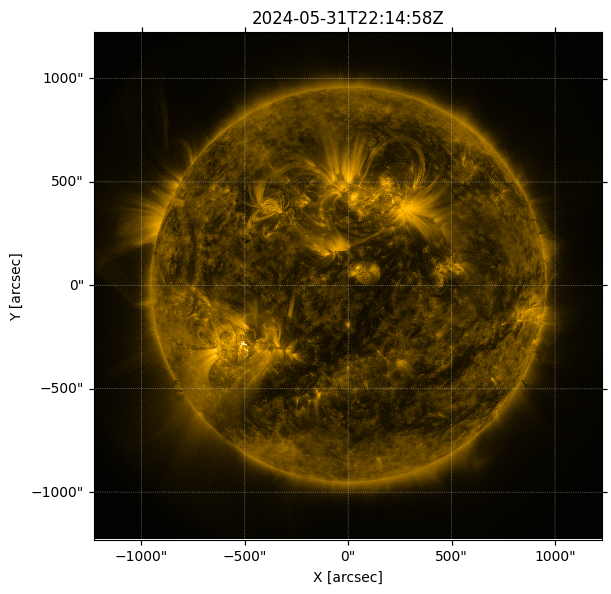

In [8]:
def init_func(fig: plt.Figure, ax: plt.Axes, map_: sunpy.map.Map):
    # drawing.limb(ax, map_.coordinate_frame.observer, color='lightgray', ls='--')
    ax.set_xlabel('X [arcsec]')
    ax.set_ylabel('Y [arcsec]')


def plot_func(fig: plt.Figure, ax: plt.Axes, map_: sunpy.map.Map):
    ax.set_title(map_.meta['t_rec'])


map_set = maker.MapSet(maps, init_func=init_func, plot_func=plot_func)
fig = plt.figure(figsize=(6,6.1), layout='constrained')
movie_maker = maker.SunpyMovieMaker([map_set], fig=fig)
movie_maker.make_movie(out_path='./aia.gif')